In [21]:
import numpy as np
import matplotlib.pyplot as plt

CreatingSynthetic Data (non-linear trend)

In [22]:
x = np.linspace(0,10,100).reshape(-1,1)
y = np.sin(x) + np.random.rand(100).reshape(-1,1)

Defining Locally Weighted Regression(Not in Scikit Learn)

In [23]:
def locally_weighted_regression(x_query, x_train, y_train, tau):
  m = x_train.shape[0]

  # Add bias term (column of 1s) to training data
  x_bias = np.hstack([np.ones_like(x_train), x_train])
  # Add bias term to query point
  x_query_bias = np.array([1, x_query])

  # Weight Function
  W = np.exp(-np.square(x_train - x_query) / (2 * tau**2))
  W = np.diagflat(W)

  # Apply the nomal equation with weights
  theta = np.linalg.pinv(x_bias.T @ W @ x_bias) @ (x_bias.T @ W @ y_train)

  # predict the output at x_query
  y_pred = x_query_bias @ theta
  return y_pred

Tune tau

In [24]:
tau = 0.5

Predict y for each x in dataset

In [25]:
y_pred = np.array([locally_weighted_regression(x_val[0], x, y, tau) for x_val in x])
y_pred = np.array(y_pred).reshape(-1,1)

Plotting the results

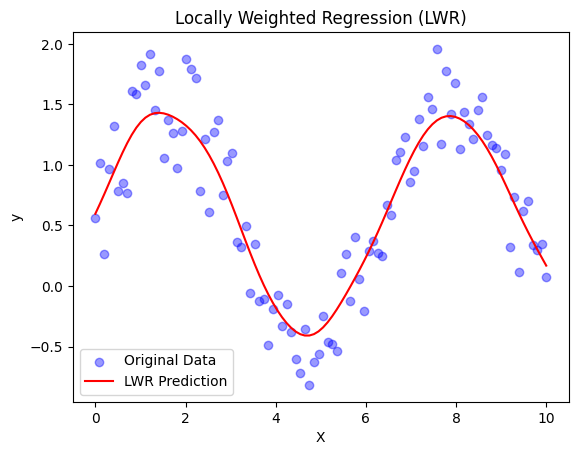

In [26]:
plt.scatter(x, y, color='blue', alpha=0.4, label='Original Data')
plt.plot(x, y_pred, color='red', label='LWR Prediction')
plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()